In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [1]:
batch1 = 10000

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_batch1 = X_train[:batch1]
y_batch1 = y_train[:batch1]
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(
    X_batch1, y_batch1, test_size=0.2, shuffle=True, random_state=42
)

NameError: name 'train_test_split' is not defined

In [3]:
def count_classes(y):
    y_flat = y.flatten()
    class_counts = np.bincount(y_flat, minlength=10)
    for cls, count in enumerate(class_counts):
        print(f"Class {cls}: {count}")
    
    return class_counts
    
count_classes(y_train)
count_classes(y_test)

NameError: name 'np' is not defined

In [38]:
input_shape = (32, 32, 3)
num_classes = 10

inputs = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs, name="CIFAR-10 CNN Classifier")
model.summary()

Model: "CIFAR-10 CNN Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,082 (2.10 MB)

 Trainable params: 550,826 (2.10 MB)

 Non-trainable params: 256 (1.00 KB)

In [32]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=20,
    shuffle=True
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.3042 - loss: 1.8401
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4545 - loss: 1.4812
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5187 - loss: 1.3262
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5638 - loss: 1.2213
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5942 - loss: 1.1387
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6195 - loss: 1.0718
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6467 - loss: 0.9968
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6670 - loss: 0.9484
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6813 - loss: 0.9131
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6941 - loss: 0.8791
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.7069 - loss: 0.8450
Epoch 12/20
782/782 ━━━━━━━━━━

In [24]:
model.save("CNN_CIFAR.keras")

In [37]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print(f"Train accuracy: {train_acc}")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

1563/1563 - 13s - 8ms/step - accuracy: 0.8160 - loss: 0.5149
Train accuracy: 0.8160399794578552
313/313 - 3s - 9ms/step - accuracy: 0.7776 - loss: 0.6454
Test accuracy: 0.7775999903678894


In [7]:
from tensorflow.keras.models import load_model
model = load_model('CNN_CIFAR.keras')

D:\Packs\python\python3.13.0\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
import numpy as np
y_pred_probs = model.predict(X_test)                     
y_pred = np.argmax(y_pred_probs, axis=1)

cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 


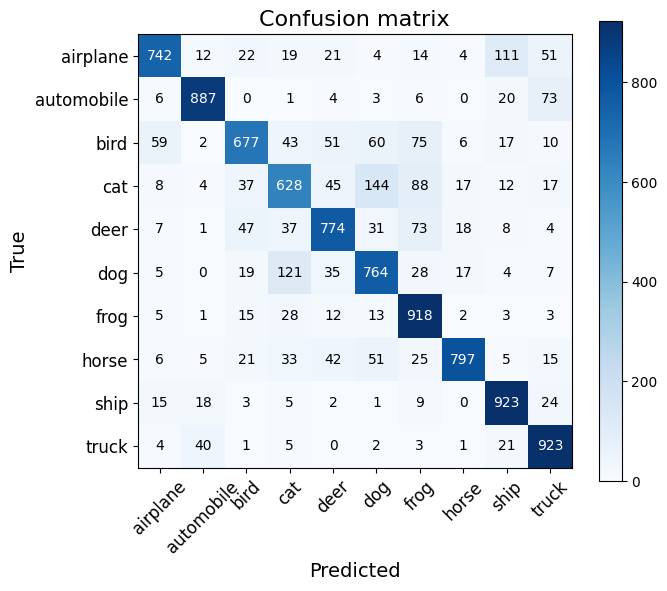

Accuracy: 0.8033
Error rate: 0.19669999999999999
Precision micro: 0.8033
Precision macro: 0.8069579790340289
Recall micro: 0.8033
Recall macro: 0.8033000000000001
F1 micro: 0.8033
F1 macro: 0.8018517040136384


In [20]:

from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
y_true = y_test_init.flatten()
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(cm, cmap='Blues')
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black',
                 fontsize=10)

plt.tight_layout()
plt.show()

acc = accuracy_score(y_true, y_pred)
precision_micro = precision_score(y_true, y_pred, average='micro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_micro = recall_score(y_true, y_pred, average='micro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print("Accuracy:", acc)
print("Error rate:", 1 - acc)
print("Precision micro:", precision_micro)
print("Precision macro:", precision_macro)
print("Recall micro:", recall_micro)
print("Recall macro:", recall_macro)
print("F1 micro:", f1_micro)
print("F1 macro:", f1_macro)